# Implementation of clustering algorithms

Build K-Means and Agglomerative Clustering models to perform an unsupervised clustering by using given data. Follow below steps as a guideline for building your model and explain each of them in code lines. 

* Data cleaning 

Start with data cleaning to ensure that your data is correct, consistent and usable. The techniques used for data cleaning may vary but you can consider to follow these basic steps: handling missing values, encoding categorical features, extracting useful features by using existing features, handling outliers etc.

* Data Preprocessing

In this step you should transform raw data into an understandable format for machine learning algorithms. This step may include scaling the features, performing dimensionality reduction etc.

* Clustering 

The goal of this step is to find distinct groups or “clusters” within a data set by using K-Means and Agglomerative Clustering Algorithms. Apply Elbow Method to determine the number of clusters. After building models, examine and comment the clusters formed via scatter plot.

* Silhouette Scores 

To evaluate how “well clustered” data points are, use the “silhouette score” and plot the Silhouette Scores for all of data points.

Note: Don't forget to explain your codes and comment on the obtained result.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster import hierarchy


In [2]:
# Reading csv data
df = pd.read_csv("dataset.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Checking shape of data
df.shape

(1338, 7)

In [4]:
# Checking for null values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# Checking if there is any inconsistency
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
# Removing outliers by using the Z-score
def remove_outliers(df):
    std_deviations = 3
    
    constrains = df.select_dtypes(include = [np.number]) 
    constrains = constrains.apply(lambda x: np.abs(x - x.mean()) / x.std() < std_deviations).all(axis=1)

    df.drop(df.index[~constrains], inplace=True)
    

remove_outliers(df)

In [7]:
# Checking if there is any inconsistency
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1309.0,39.262032,14.085397,18.0000,27.0000,39.0000,51.0000,64.0000
bmi,1309.0,30.584037,5.975320,15.9600,26.3150,30.3050,34.5800,48.0700
children,1309.0,1.045073,1.124627,0.0000,0.0000,1.0000,2.0000,4.0000
charges,1309.0,13089.622269,11738.168486,1121.8739,4686.3887,9377.9047,16577.7795,49577.6624


In [8]:
# Converting non-numeric binary variables to numeric binary variables
convert = {'female':0, 'male':1, 'no':0, 'yes':1}
df = df[df.columns].replace(convert)

# Dropping categorical variable 'region' for dimension reduction
df = df.drop(columns=["region"])
df

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


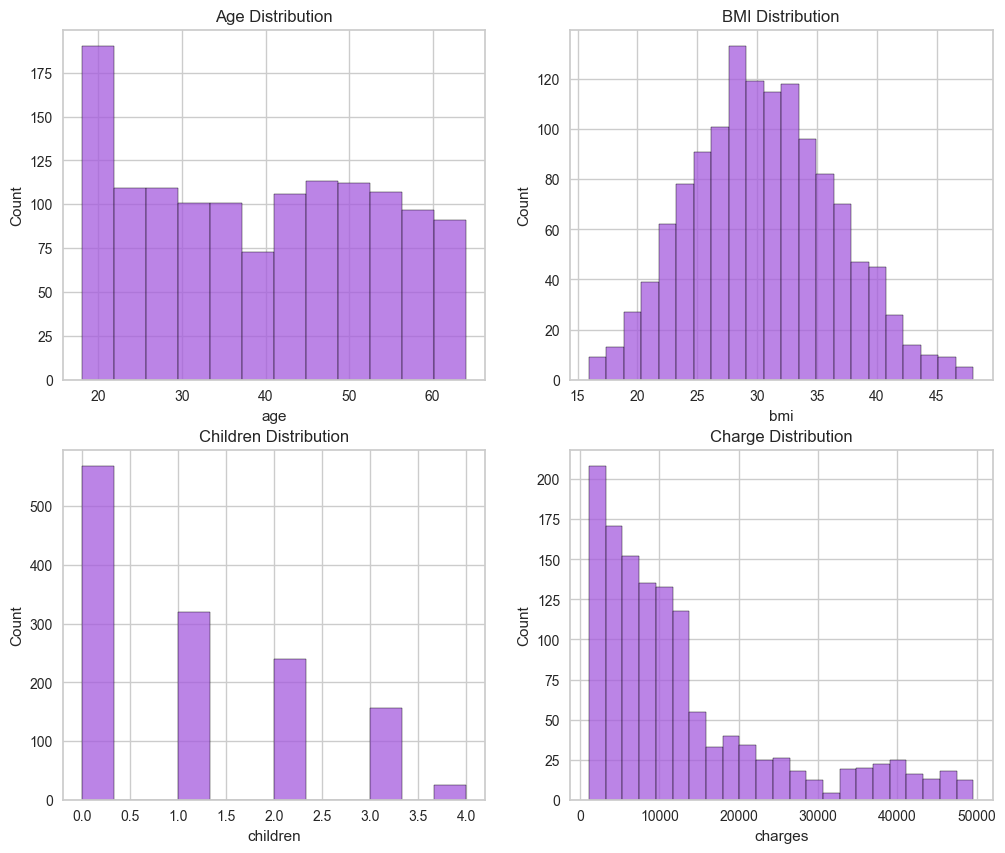

In [9]:
# Plotting the data to see the distributions
plt.rcParams["figure.figsize"] = [12, 10]
fig , axs = plt.subplots(2,2)

sns.histplot(df.age, ax=axs[0][0], color="#a55bde")
sns.histplot(df.bmi, ax=axs[0][1], color="#a55bde")
sns.histplot(df.children, ax=axs[1][0], color="#a55bde")
sns.histplot(df.charges, ax=axs[1][1], color="#a55bde")

axs[0][0].set_title("Age Distribution")
axs[0][1].set_title("BMI Distribution")
axs[1][0].set_title("Children Distribution")
axs[1][1].set_title("Charge Distribution")

plt.show()

In [10]:
# Scaling the data with StandardScaler
scaler = StandardScaler()
df_scaled = df
df_scaled = scaler.fit_transform(df)

In [11]:
# Calculating squared distances and silhouette scores for different k-values
squared_distances = []

for k in range(2,21):
    km = KMeans(n_clusters=k)
    km.fit(df_scaled)
    squared_distances.append(km.inertia_)  
    
    preds = km.fit_predict(df_scaled)    
    score = silhouette_score(df_scaled, preds, metric='euclidean')
    print (f"For k = {k}, silhouette score is {score}")


For k = 2, silhouette score is 0.348139073339367
For k = 3, silhouette score is 0.25669243650027207
For k = 4, silhouette score is 0.23393722115802673
For k = 5, silhouette score is 0.23431314189277
For k = 6, silhouette score is 0.240258268761819
For k = 7, silhouette score is 0.2565751115871606
For k = 8, silhouette score is 0.27875798250347394
For k = 9, silhouette score is 0.2748574284033319
For k = 10, silhouette score is 0.2688022178794004
For k = 11, silhouette score is 0.2659940127742858
For k = 12, silhouette score is 0.2778265280789222
For k = 13, silhouette score is 0.26654721298021344
For k = 14, silhouette score is 0.27213258132945223
For k = 15, silhouette score is 0.2729927337567128
For k = 16, silhouette score is 0.26529315196153164
For k = 17, silhouette score is 0.26390292626654205
For k = 18, silhouette score is 0.2671438070925371
For k = 19, silhouette score is 0.2722642400006263
For k = 20, silhouette score is 0.2703546679810505


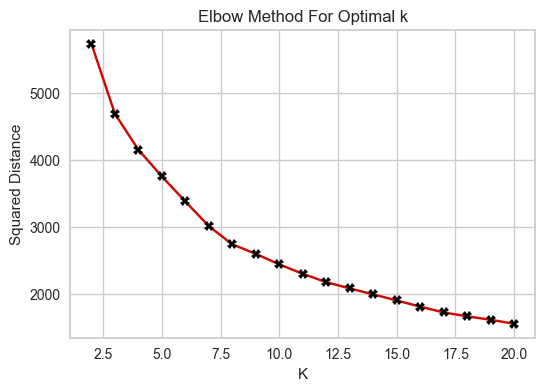

In [12]:
# Plotting elbow curve
plt.rcParams["figure.figsize"] = [6, 4]
plt.plot(range(2,21), squared_distances, color='r', marker='X', markerfacecolor='#000000')
plt.xlabel('K')
plt.ylabel('Squared Distance')
plt.title('Elbow Method For Optimal k')
plt.show()

In [13]:
# Building k-Means clustering model with the best k-value
km = KMeans(n_clusters=2)
km.fit(df_scaled)
cluster_label = km.labels_
df['label1'] = cluster_label
df.head()

,age,sex,bmi,children,smoker,charges,label1
0,19,0,27.900,0,1,16884.92400,0
1,18,1,33.770,1,0,1725.55230,1
2,28,1,33.000,3,0,4449.46200,1
3,33,1,22.705,0,0,21984.47061,1
4,32,1,28.880,0,0,3866.85520,1


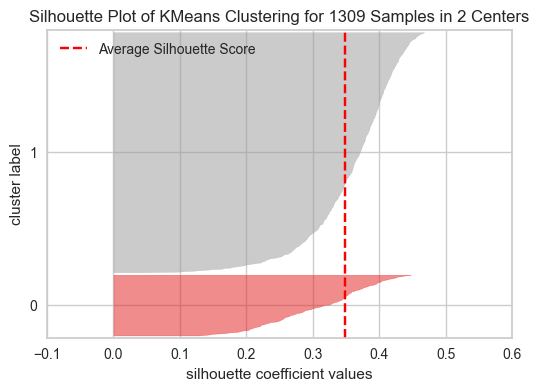

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1309 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [14]:
# Plotting silhouette score of each data point
visualizer = SilhouetteVisualizer(km)
visualizer.fit(df_scaled)
visualizer.show()

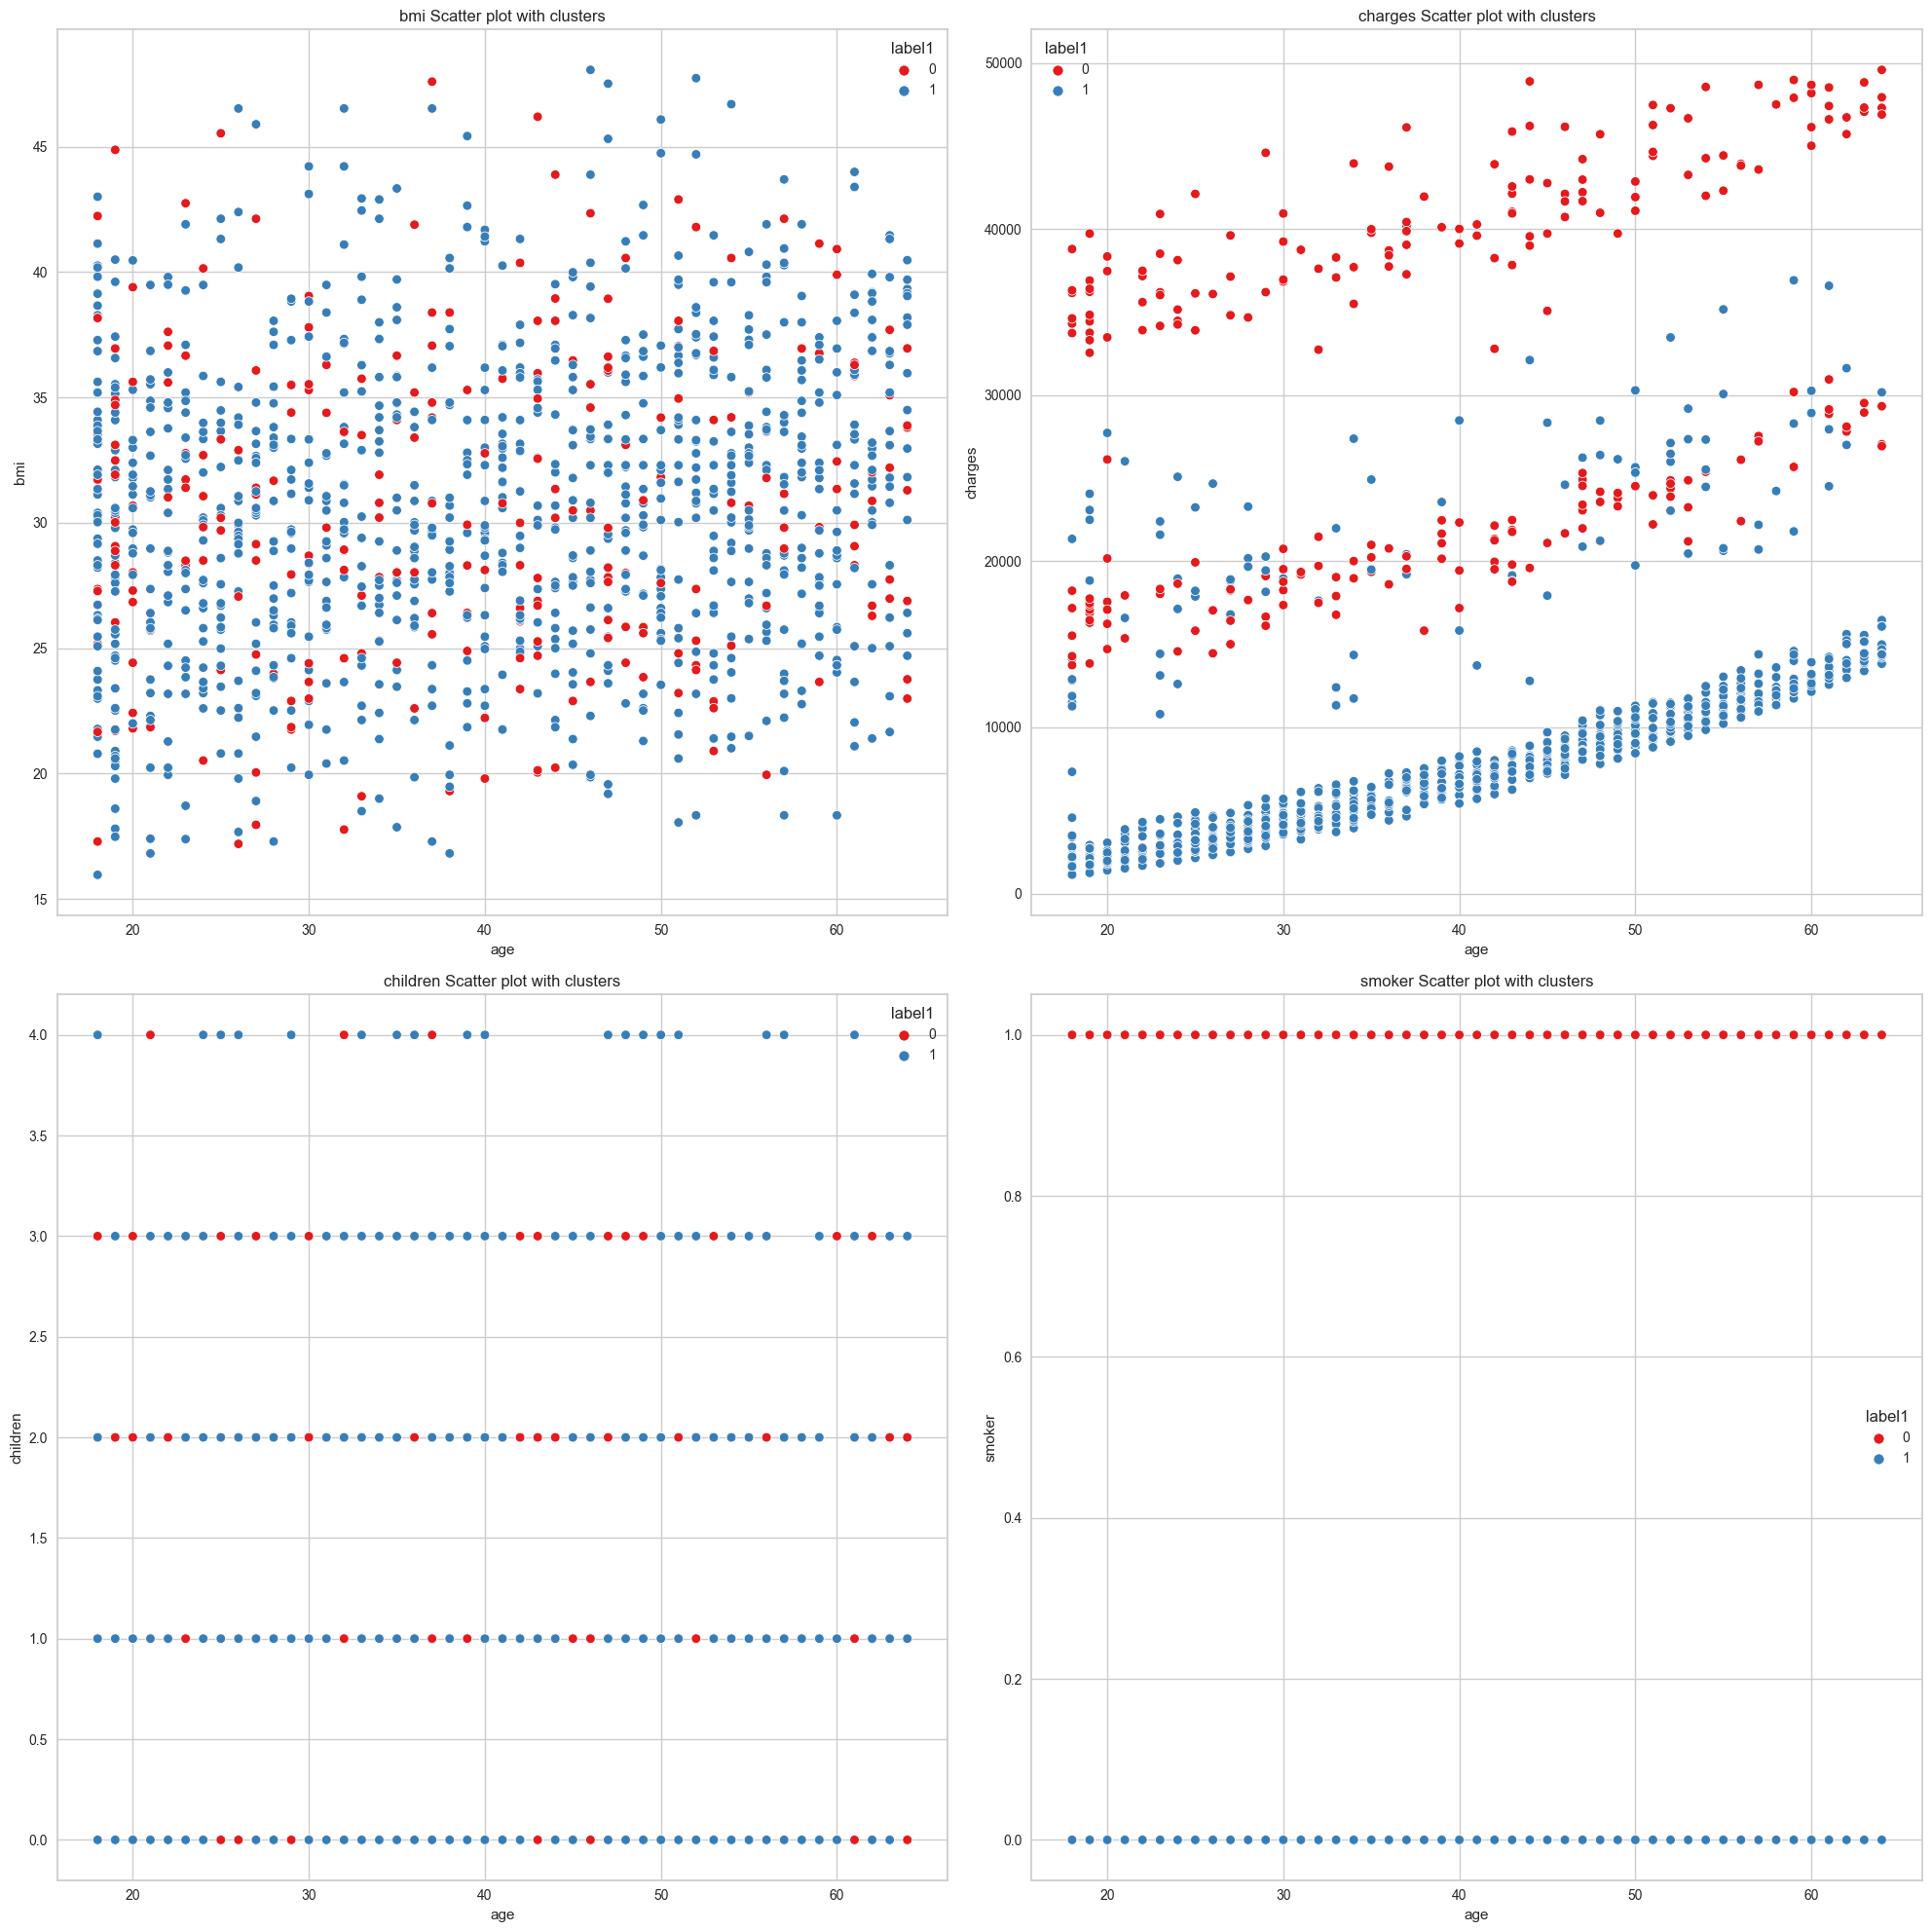

In [15]:
# Plotting scatter plots to see the clusters

f = plt.figure(figsize=(20,20))
scatter_cols =['bmi', 'charges', "children", "smoker" ]

for i, col in enumerate(scatter_cols):
    ax=f.add_subplot(2,2,i+1)
    sns.scatterplot(x=df['age'], y=df[col], hue=df['label1'], palette='Set1')
    ax.set_title(col+" Scatter plot with clusters")
    plt.ylabel(col)
f.tight_layout()

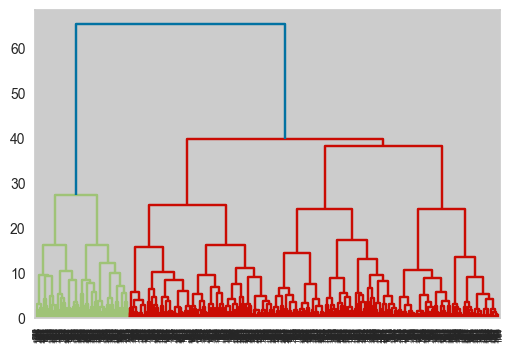

In [16]:
# Plotting dendrogram to see the hierarchy
dendro = hierarchy.dendrogram(hierarchy.linkage(df_scaled, method="ward", metric="euclidean"))

In [17]:
# Building Agglomerative clustering model with 2 clusters
agl = AgglomerativeClustering(n_clusters=2)
agl.fit(df_scaled)
cluster_label = agl.labels_
df['label2'] = cluster_label
df

,age,sex,bmi,children,smoker,charges,label1,label2
0,19,0,27.900,0,1,16884.92400,0,1
1,18,1,33.770,1,0,1725.55230,1,0
2,28,1,33.000,3,0,4449.46200,1,0
3,33,1,22.705,0,0,21984.47061,1,0
4,32,1,28.880,0,0,3866.85520,1,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0
1334,18,0,31.920,0,0,2205.98080,1,0
1335,18,0,36.850,0,0,1629.83350,1,0
1336,21,0,25.800,0,0,2007.94500,1,0


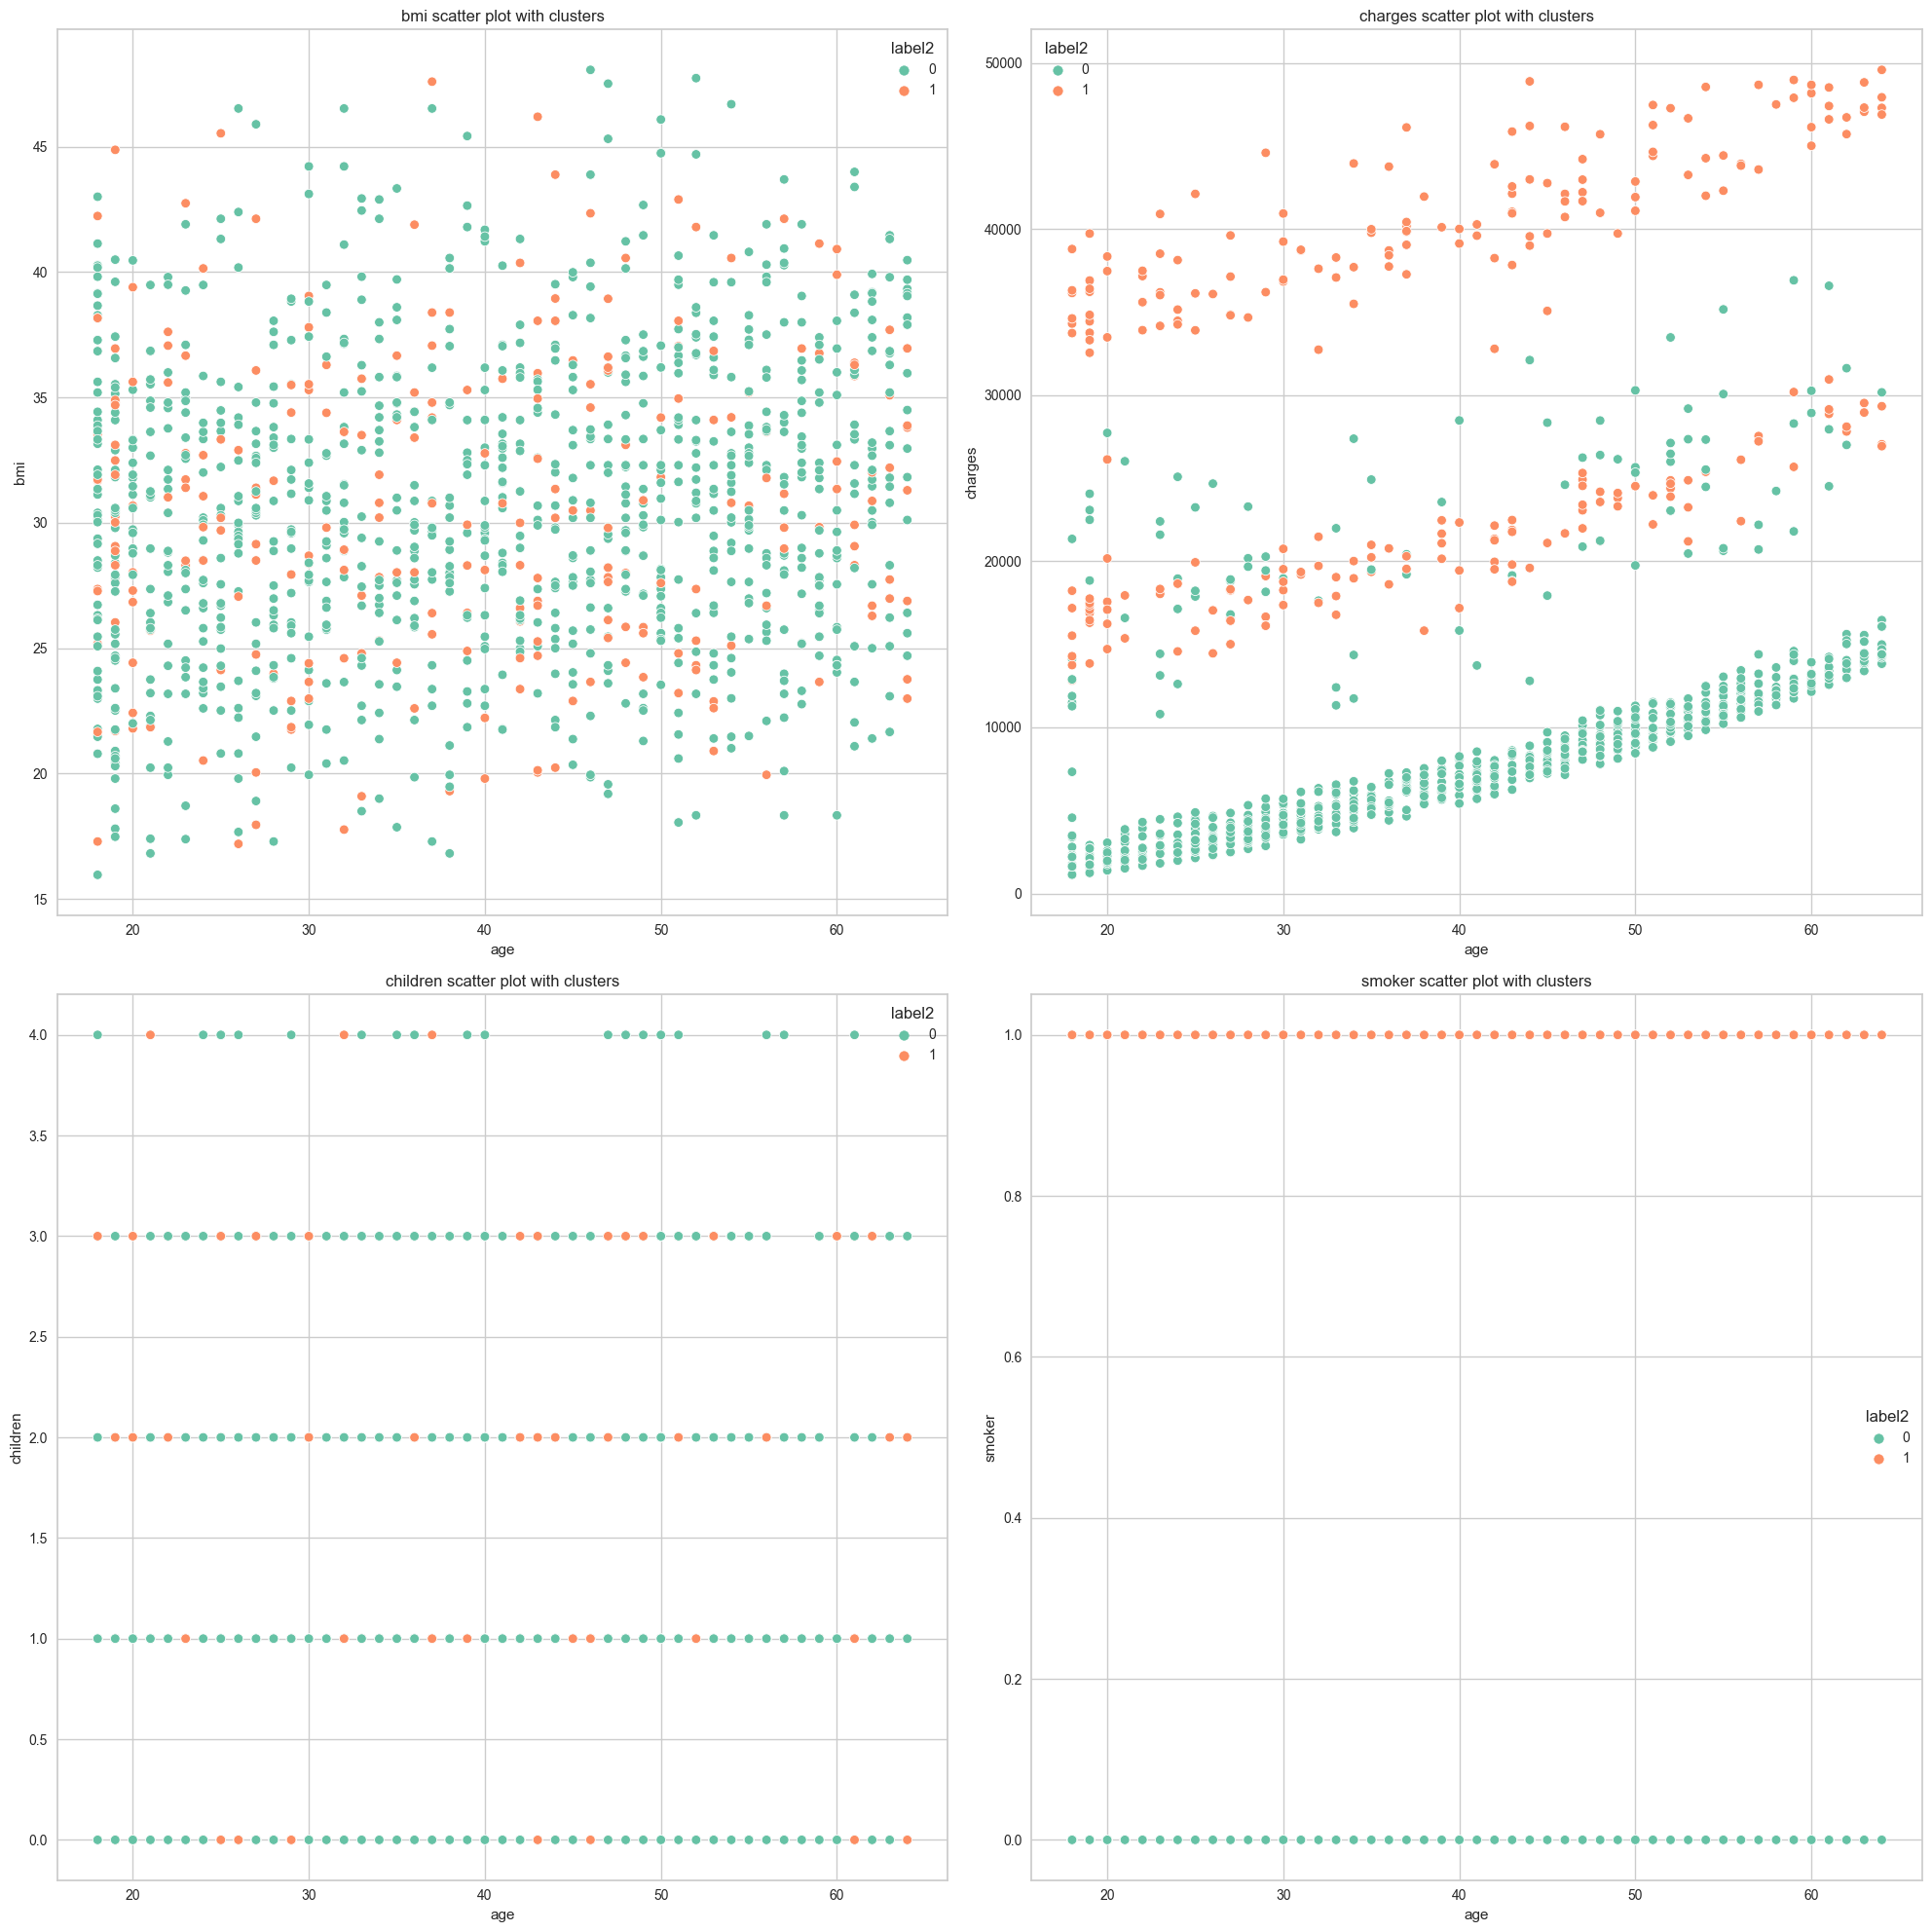

In [18]:
# Plotting scatter plots to see the clusters

f = plt.figure(figsize=(20,20))
scatter_cols =['bmi', 'charges', "children", "smoker" ]

for i, col in enumerate(scatter_cols):
    ax=f.add_subplot(2,2,i+1)
    sns.scatterplot(x=df['age'], y=df[col], hue=df['label2'], palette='Set2')
    ax.set_title(col+" scatter plot with clusters")
    plt.ylabel(col)
f.tight_layout()